In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
n1,n2,n3 = 0,0,1

t = -184

C = np.cos(np.radians(t))
S = np.sin(np.radians(t))

T = np.array([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

sv = np.array([[-8.523, -0.6827, 0.6218], [-0.6827, 1.0977, -8.808], [0.6218, -8.808, 0.0]])

h = T @ sv @ T.T

print(h)

[[-8.57119948e+00 -6.58468433e-03 -5.87030571e-03]
 [-6.58468433e-03  1.14589948e+00  8.82991873e+00]
 [-5.87030571e-03  8.82991873e+00  0.00000000e+00]]


In [121]:
n1,n2,n3 = 0,0,1

t = 30

C = np.cos(np.radians(t))
S = np.sin(np.radians(t))

T = np.array([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

sv = np.array([[-6.142, 4.208, 4.414], [4.208, -1.283, 7.647], [4.414, 7.647, 0.0]])

h = T @ sv @ T.T

print(h)

[[-8.57148490e+00 -8.71849429e-06 -8.63867695e-04]
 [-8.71849429e-06  1.14648490e+00  8.82949626e+00]
 [-8.63867695e-04  8.82949626e+00  0.00000000e+00]]


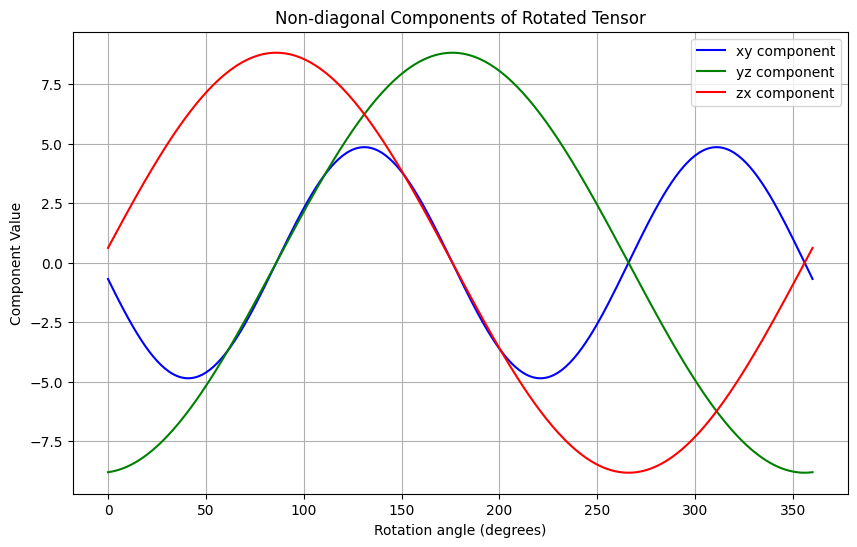

xy成分 と zx成分 が同時に 0 となる角度 (度): [176.0, 356.0]


In [122]:
# 固定の回転軸 (0, 0, 1)
n1, n2, n3 = 0, 0, 1

# テンソル sv の初期値
sv = np.array([[-8.523, -0.6827, 0.6218],
               [-0.6827, 1.0977, -8.808],
               [0.6218, -8.808, 0.0]])

# 回転角度 x の範囲を 0 ~ 360 度とする
angles = np.linspace(0, 360, 361)
xy_values, yz_values, zx_values = [], [], []
zero_angle_results = []  # 条件を満たす角度を保存するリスト

# 許容範囲を拡大 (精度を調整可能)
tolerance = 1e-1

# 各角度に対して非対角成分 (xy, yz, zx) を計算
for x in angles:
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    
    T = np.array([[n1**2 * (1 - C) + C, n1 * n2 * (1 - C) - n3 * S, n1 * n3 * (1 - C) + n2 * S], 
                  [n1 * n2 * (1 - C) + n3 * S, n2**2 * (1 - C) + C, n2 * n3 * (1 - C) - n1 * S], 
                  [n1 * n3 * (1 - C) - n2 * S, n2 * n3 * (1 - C) + n1 * S, n3**2 * (1 - C) + C]])

    # 回転後のテンソル
    h = T @ sv @ T.T

    # 非対角成分を抽出
    xy_values.append(h[0, 1])
    yz_values.append(h[1, 2])
    zx_values.append(h[2, 0])

    # h[0,1] と h[2,0] が許容範囲内で 0 に近いときの x を保存
    if np.isclose(h[0, 1], 0, atol=tolerance) and np.isclose(h[2, 0], 0, atol=tolerance):
        zero_angle_results.append(x)

# グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(angles, xy_values, label="xy component", color='blue')
plt.plot(angles, yz_values, label="yz component", color='green')
plt.plot(angles, zx_values, label="zx component", color='red')

plt.title("Non-diagonal Components of Rotated Tensor")
plt.xlabel("Rotation angle (degrees)")
plt.ylabel("Component Value")
plt.legend()
plt.grid()
plt.show()

# 条件を満たす角度を表示
print("xy成分 と zx成分 が同時に 0 となる角度 (度):", zero_angle_results)

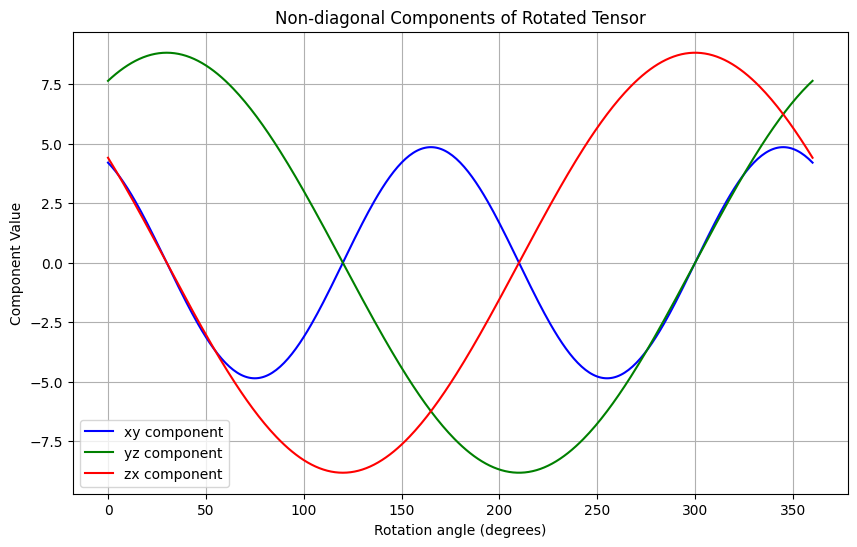

xy成分 と zx成分 が同時に 0 となる角度 (度): [30.0, 210.0]


In [123]:
# 固定の回転軸 (0, 0, 1)
n1, n2, n3 = 0, 0, 1

# テンソル sv の初期値
sv = np.array([[-6.142, 4.208, 4.414], [4.208, -1.283, 7.647], [4.414, 7.647, 0.0]])

# 回転角度 x の範囲を 0 ~ 360 度とする
angles = np.linspace(0, 360, 361)
xy_values, yz_values, zx_values = [], [], []
zero_angle_results = []  # 条件を満たす角度を保存するリスト

# 許容範囲を拡大 (精度を調整可能)
tolerance = 1e-1

# 各角度に対して非対角成分 (xy, yz, zx) を計算
for x in angles:
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    
    T = np.array([[n1**2 * (1 - C) + C, n1 * n2 * (1 - C) - n3 * S, n1 * n3 * (1 - C) + n2 * S], 
                  [n1 * n2 * (1 - C) + n3 * S, n2**2 * (1 - C) + C, n2 * n3 * (1 - C) - n1 * S], 
                  [n1 * n3 * (1 - C) - n2 * S, n2 * n3 * (1 - C) + n1 * S, n3**2 * (1 - C) + C]])

    # 回転後のテンソル
    h = T @ sv @ T.T

    # 非対角成分を抽出
    xy_values.append(h[0, 1])
    yz_values.append(h[1, 2])
    zx_values.append(h[2, 0])

    # h[0,1] と h[2,0] が許容範囲内で 0 に近いときの x を保存
    if np.isclose(h[0, 1], 0, atol=tolerance) and np.isclose(h[2, 0], 0, atol=tolerance):
        zero_angle_results.append(x)

# グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(angles, xy_values, label="xy component", color='blue')
plt.plot(angles, yz_values, label="yz component", color='green')
plt.plot(angles, zx_values, label="zx component", color='red')

plt.title("Non-diagonal Components of Rotated Tensor")
plt.xlabel("Rotation angle (degrees)")
plt.ylabel("Component Value")
plt.legend()
plt.grid()
plt.show()

# 条件を満たす角度を表示
print("xy成分 と zx成分 が同時に 0 となる角度 (度):", zero_angle_results)